# import important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
house=pd.read_csv('/kaggle/input/housing-prices-dataset/Housing.csv')
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
house.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
house.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
house.duplicated().sum()

0

# EDA

In [9]:
for i in house.columns:
    print(i,'is', house[i].nunique())

price is 219
area is 284
bedrooms is 6
bathrooms is 4
stories is 4
mainroad is 2
guestroom is 2
basement is 2
hotwaterheating is 2
airconditioning is 2
parking is 4
prefarea is 2
furnishingstatus is 3


In [10]:
correlation_matrix = house.corr(numeric_only=True)
price_correlation = correlation_matrix["price"].sort_values(ascending=False)
price_correlation


price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64

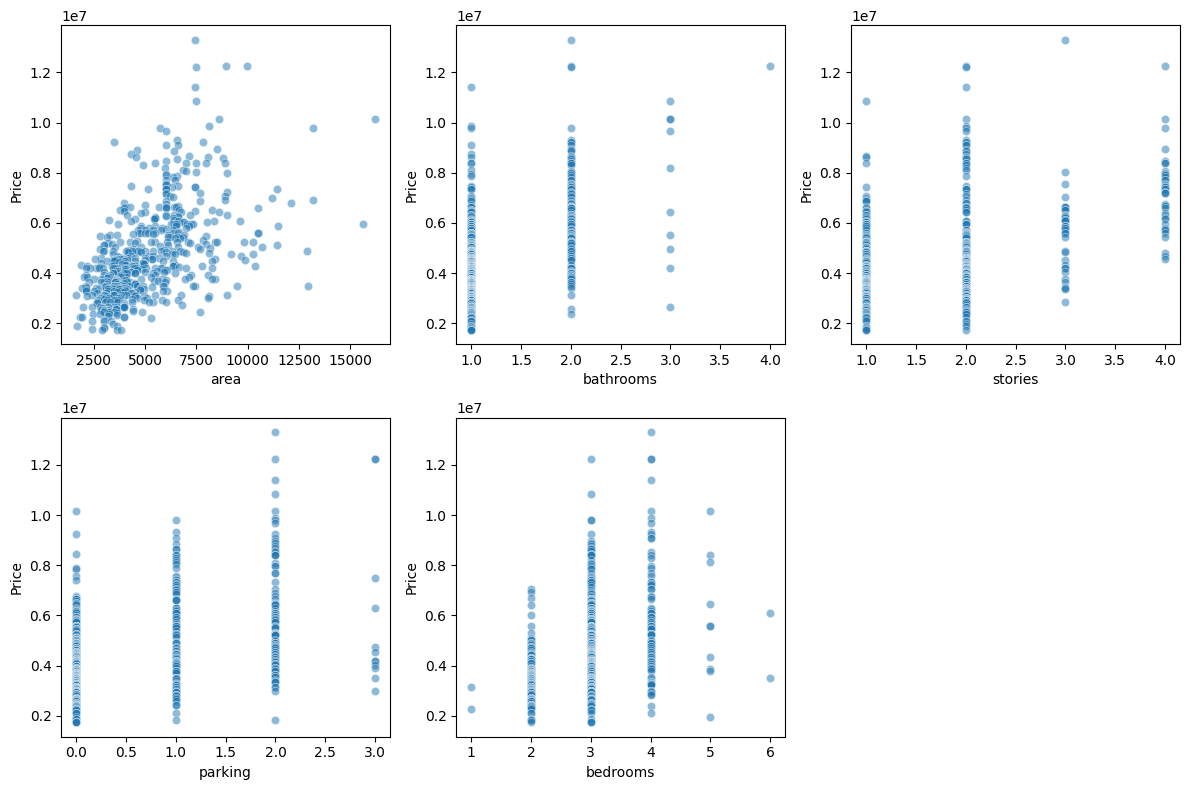

In [11]:
plt.figure(figsize=(12, 8))
numeric_features = ["area", "bathrooms", "stories", "parking", "bedrooms"]

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=house[feature], y=house["price"], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("Price")

plt.tight_layout()
plt.show()


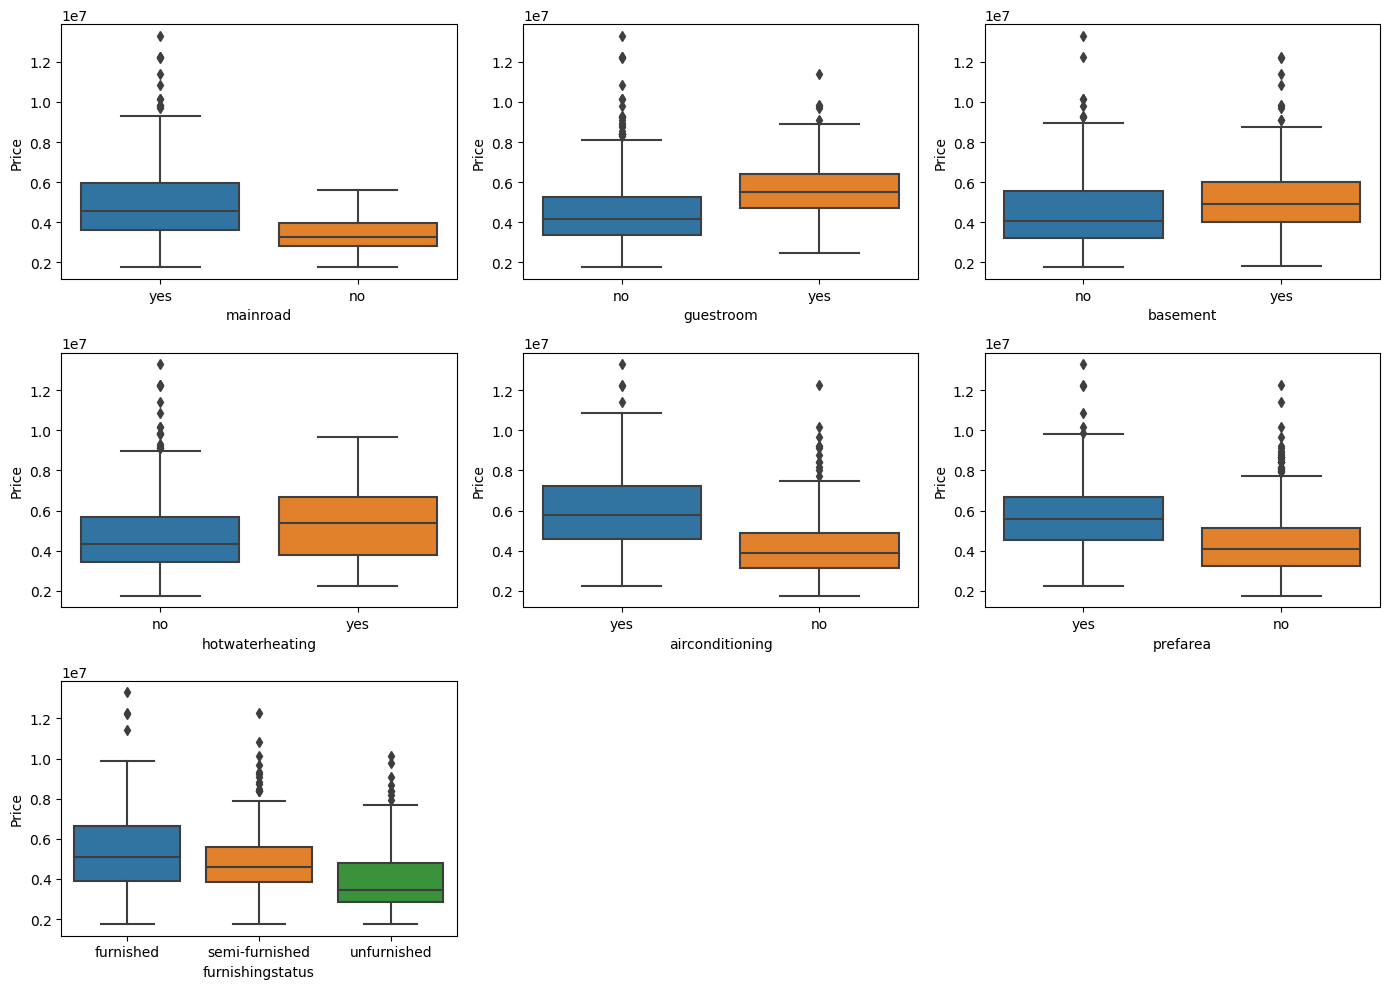

In [12]:
plt.figure(figsize=(14, 10))
categorical_features = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=house[feature], y=house["price"])
    plt.xlabel(feature)
    plt.ylabel("Price")

plt.tight_layout()
plt.show()


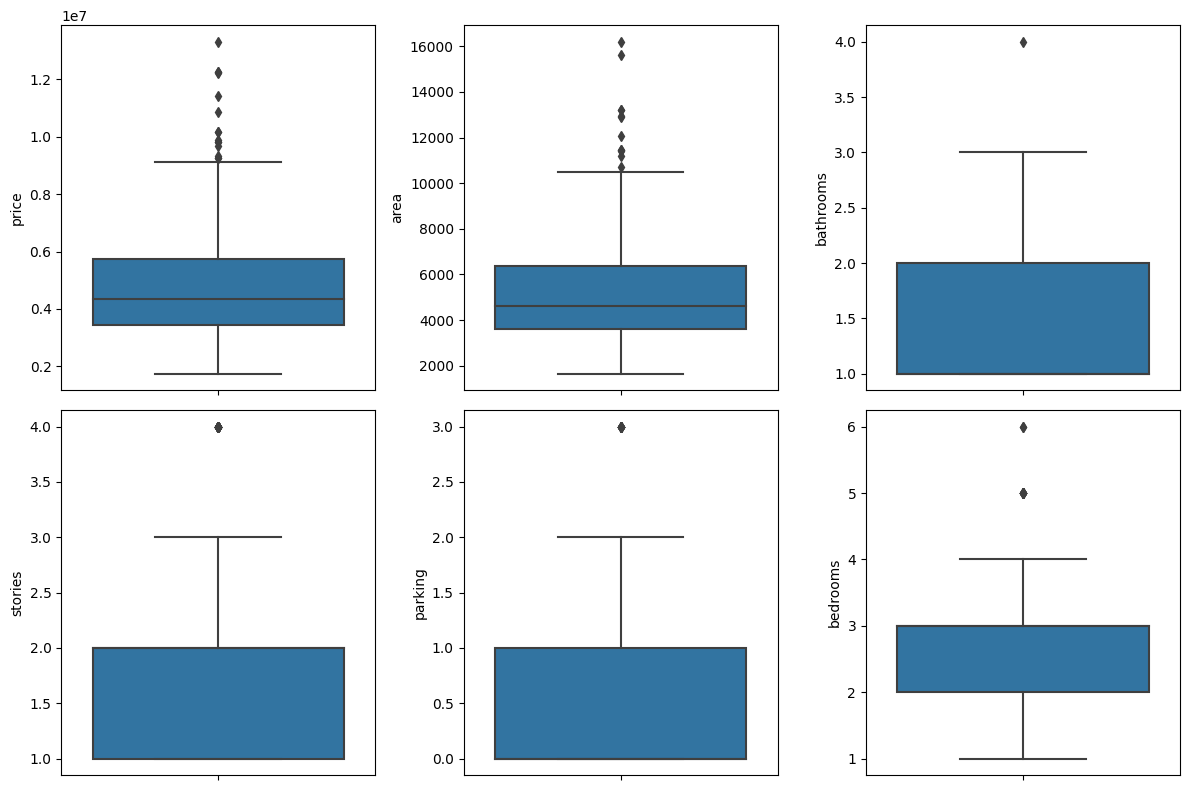

In [13]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(["price", "area", "bathrooms", "stories", "parking", "bedrooms"], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=house[feature])
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In [14]:
stats_summary = house[["price", "area", "bathrooms", "stories", "parking", "bedrooms"]].describe().T
stats_summary["Skewness"] = house[["price", "area", "bathrooms", "stories", "parking", "bedrooms"]].skew()
stats_summary["Kurtosis"] = house[["price", "area", "bathrooms", "stories", "parking", "bedrooms"]].kurtosis()

stats_summary


,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0,1.212239,1.960130
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0,1.321188,2.751480
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0,1.589264,2.164856
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0,1.082088,0.679404
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0,0.842062,-0.573063
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0,0.495684,0.728323


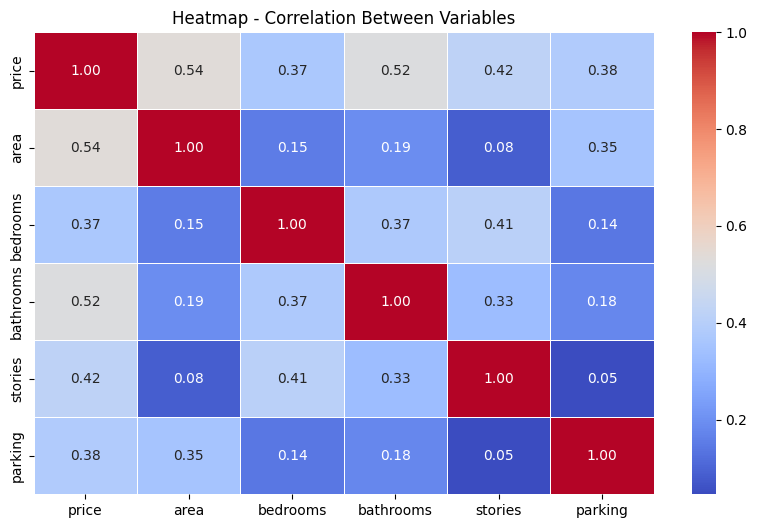

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(house.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap - Correlation Between Variables")
plt.show()


In [16]:
def remove_outliers(house, column):
    Q1 = house[column].quantile(0.25)
    Q3 = house[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return house[(house[column] >= lower_bound) & (house[column] <= upper_bound)]

columns_to_clean = ["price", "area", "bathrooms", "stories", "parking"]
df_cleaned = house.copy()

for col in columns_to_clean:
    df_cleaned = remove_outliers(df_cleaned, col)
original_count = house.shape[0]
cleaned_count = df_cleaned.shape[0]
removed_count = original_count - cleaned_count

original_count, cleaned_count, removed_count


(545, 370, 175)

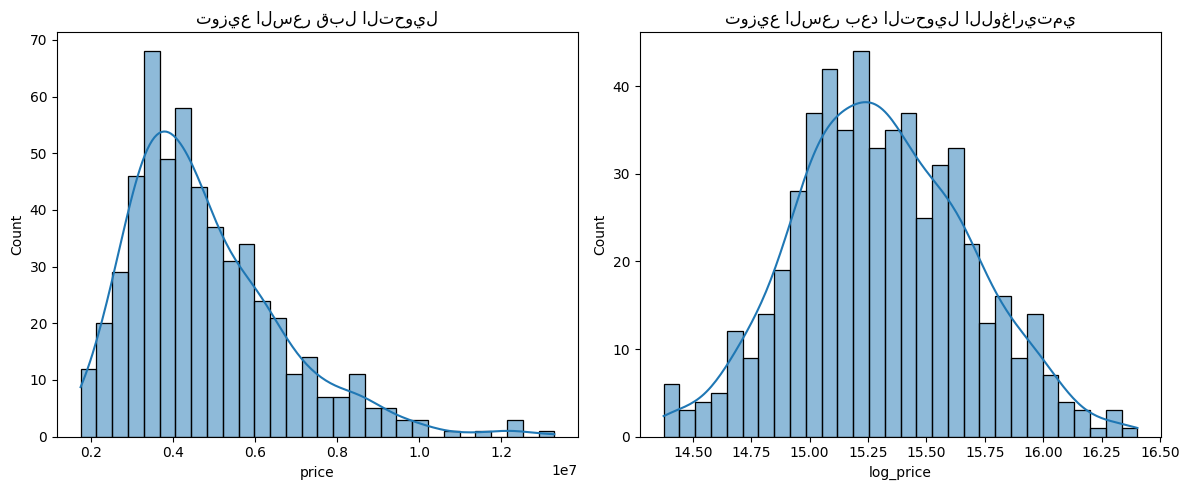

In [17]:
house["log_price"] = np.log(house["price"])
house["log_area"] = np.log(house["area"])
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(house["price"], bins=30, kde=True)
plt.title("توزيع السعر قبل التحويل")

plt.subplot(1, 2, 2)
sns.histplot(house["log_price"], bins=30, kde=True)
plt.title("توزيع السعر بعد التحويل اللوغاريتمي")

plt.tight_layout()
plt.show()


In [18]:
missing_values = house.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)